In [47]:
# Bibliotecas Importadas

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
dados = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')

In [49]:
dados

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

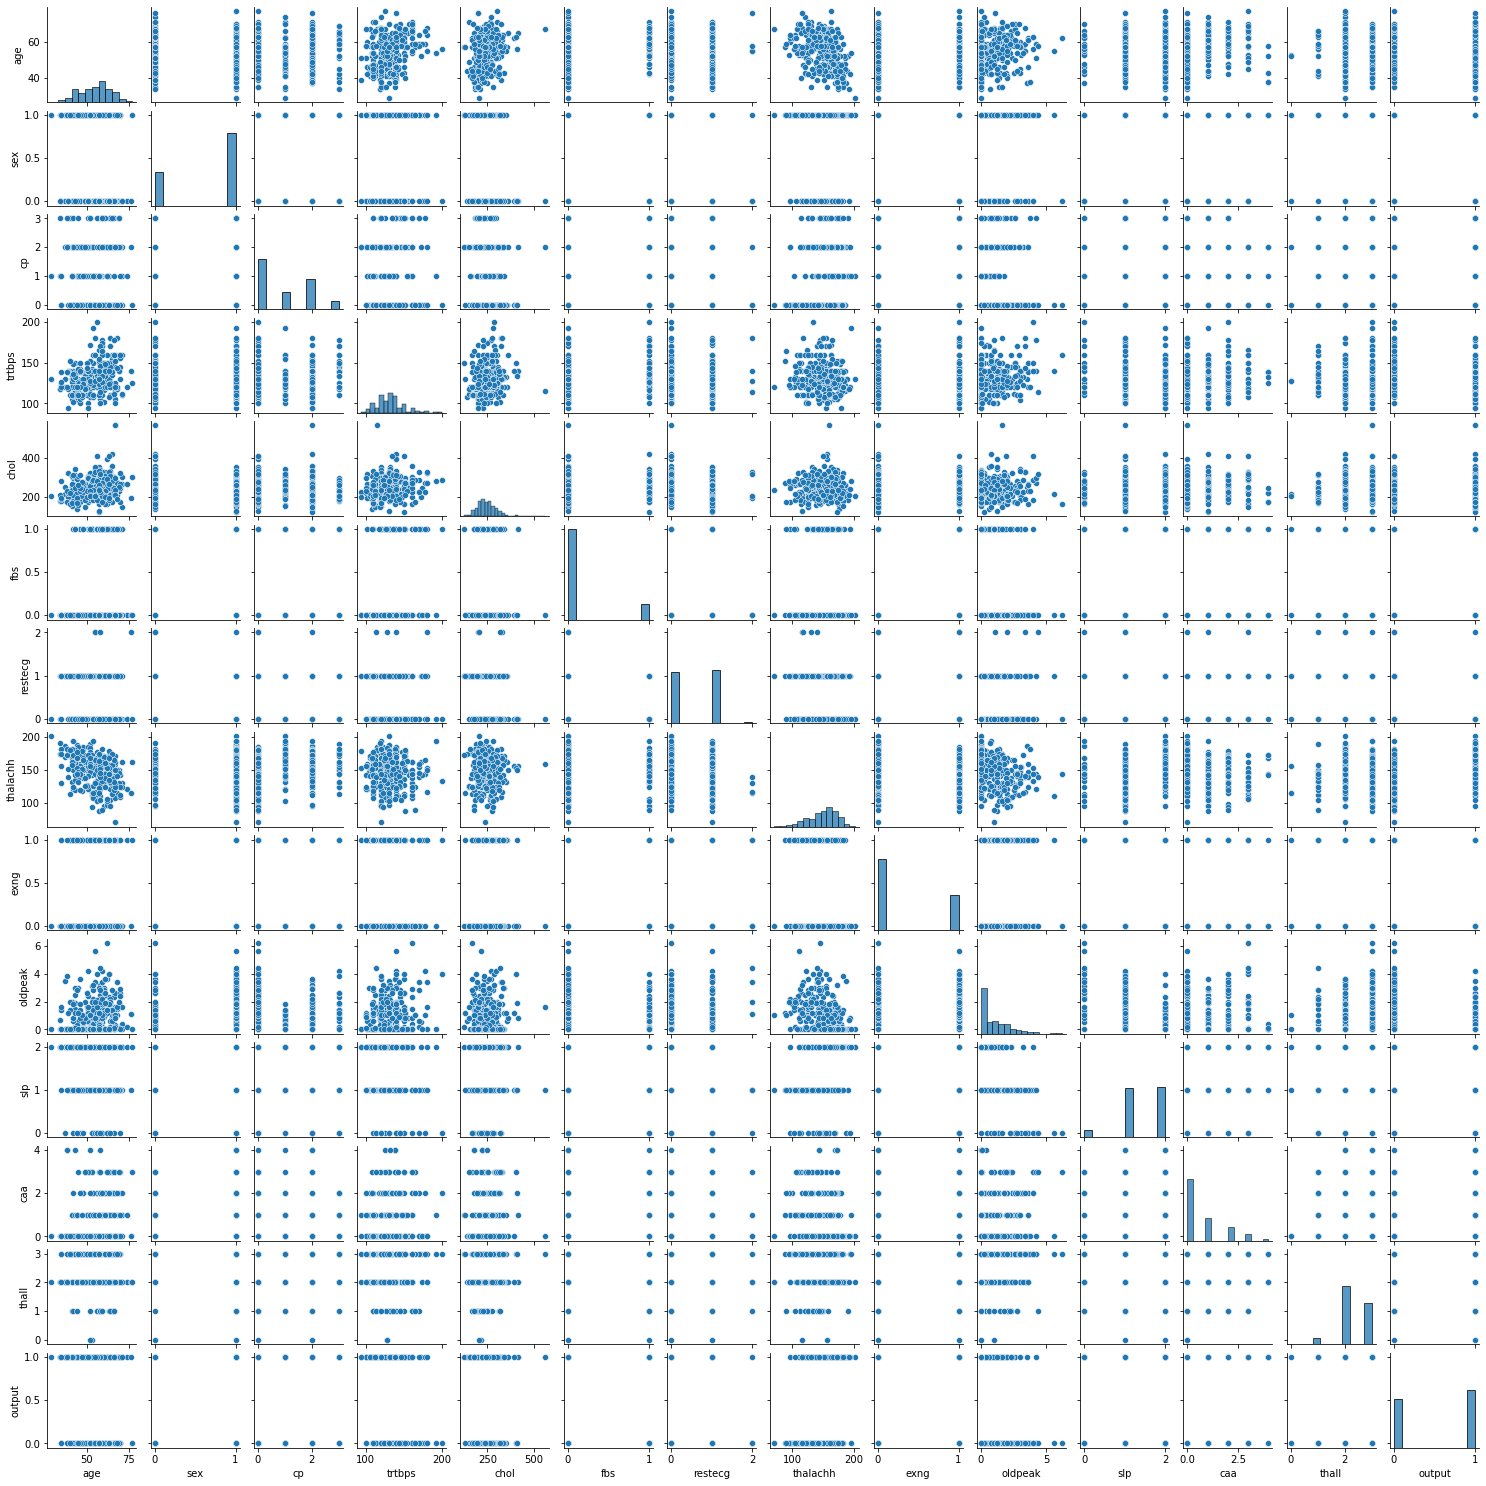

In [50]:
sns.pairplot(dados, height=1.5);

### Regressão Logística

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [52]:
var_target = dados.output
var_logist = dados.drop(['output'], axis=1)

In [53]:
x_treino, x_teste, y_treino, y_teste = train_test_split(var_logist, var_target, test_size = 0.3)

In [54]:
logistic = LogisticRegression()
logistic.fit(x_treino, y_treino)
predicao = logistic.predict(x_teste)
predicao

C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [55]:
print(f'Acuracia da Regressão Logística com o treino: {(logistic.score(x_treino, y_treino)*100).round(2)}%.')
print(f'Acuracia da Regressão Logística com o teste: {(logistic.score(x_teste, y_teste)*100).round(2)}%.')

Acuracia da Regressão Logística com o treino: 85.85%.
Acuracia da Regressão Logística com o teste: 82.42%.


In [56]:
confusion_matrix(y_teste, predicao)

array([[34,  8],
       [ 8, 41]], dtype=int64)